In [ ]:
# Same as Notebook #2 but using different flatten method

In [1]:
%matplotlib inline
import matplotlib
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import os
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [10]:
# Target star: XO-2N
# TIC 356473034
XO_2N_lcf = lk.search.search_lightcurvefile('TIC 356473034', sector=20).download()
XO_2N_tpf = lk.search.search_targetpixelfile('TIC 356473034', sector=20).download()

C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_18348\540954861.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  XO_2N_lcf = lk.search.search_lightcurvefile('TIC 356473034', sector=20).download()
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel

In [ ]:
# Contaminant star: XO-2S
# TIC 356473029
XO_2S_lcf = lk.search.search_lightcurvefile('TIC 356473029', sector=20).download()
# XO_2S_tpf = lk.search.search_targetpixelfile('TIC 356473029', sector=20).download()

<AxesSubplot:title={'center':'Target ID: 356473034, Cadence: 442835'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

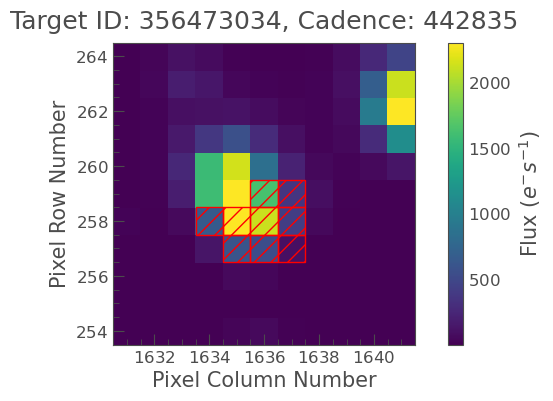

In [4]:
# Checking the mask for the target and contaminant star

XO_2N_tpf.plot(aperture_mask=XO_2N_tpf.pipeline_mask)
# XO_2S_tpf.plot(aperture_mask=XO_2S_tpf.pipeline_mask)

<AxesSubplot:title={'center':'Target ID: 356473034, Cadence: 442835'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

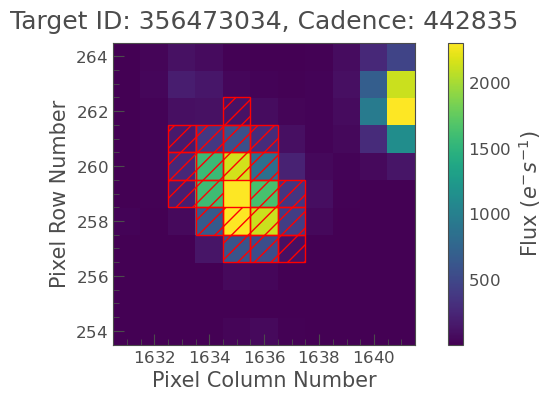

In [5]:
%matplotlib inline 
custom_mask = XO_2N_tpf.pipeline_mask

custom_mask[5,2:4] = True
custom_mask[6,2:6] = True
custom_mask[7,2:6] = True
custom_mask[8,4] = True

XO_2N_tpf.plot(aperture_mask=custom_mask)


(16500.0, 17000.0)

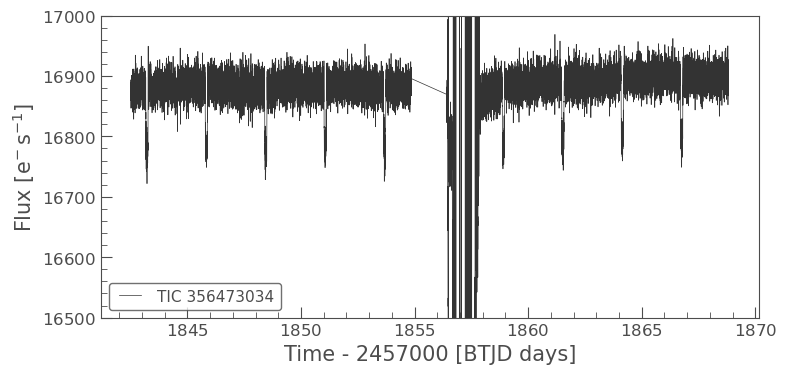

In [8]:
XO_2N_customSAP = XO_2N_tpf.to_lightcurve(aperture_mask=custom_mask)
XO_2N_customSAP_quality = (XO_2N_customSAP.quality == 0)

XO_2N_customSAP_time = XO_2N_customSAP.time[XO_2N_customSAP_quality]
XO_2N_customSAP_flux = XO_2N_customSAP.flux[XO_2N_customSAP_quality]
XO_2N_customSAP_flux_err = XO_2N_customSAP.flux_err[XO_2N_customSAP_quality]

XO_2N_customSAP.plot()
plt.ylim(16500,17000)

In [14]:
XO_2N_sumSAP_quality = (XO_2N_lcf.SAP_FLUX.quality == 0) & (XO_2S_lcf.SAP_FLUX.quality == 0)
XO_2N_sumSAP_flux = XO_2N_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality] + XO_2S_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality]
XO_2N_sumSAP_time = XO_2N_lcf.SAP_FLUX.time[XO_2N_sumSAP_quality]
XO_2N_sumSAP_flux_err = np.sqrt(XO_2N_lcf.SAP_FLUX.flux_err[XO_2N_sumSAP_quality]**2 + XO_2S_lcf.SAP_FLUX.flux_err[XO_2N_sumSAP_quality]**2)

# computing the sum of two PDCSAPs
XO_2N_sumPDC_quality = (XO_2N_lcf.PDCSAP_FLUX.quality == 0) & (XO_2S_lcf.PDCSAP_FLUX.quality == 0)
XO_2N_sumPDC_flux = XO_2N_lcf.PDCSAP_FLUX.flux[XO_2N_sumPDC_quality] + XO_2S_lcf.PDCSAP_FLUX.flux[XO_2N_sumPDC_quality]
XO_2N_sumPDC_time = XO_2N_lcf.PDCSAP_FLUX.time[XO_2N_sumPDC_quality]
XO_2N_sumPDC_flux_err = np.sqrt(XO_2N_lcf.PDCSAP_FLUX.flux_err[XO_2N_sumPDC_quality]**2 + XO_2S_lcf.PDCSAP_FLUX.flux_err[XO_2N_sumPDC_quality]**2)


C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_18348\2777169336.py:3: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_quality = (XO_2N_lcf.SAP_FLUX.quality == 0) & (XO_2S_lcf.SAP_FLUX.quality == 0)
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_18348\2777169336.py:4: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_flux = XO_2N_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality] + XO_2S_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality]
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_18348\2777169336.py:5: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_time = XO_2N_lcf.SAP_FLUX.time[XO_2N_sumSAP_quality]
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_18348\2777169336.py:6: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a futur

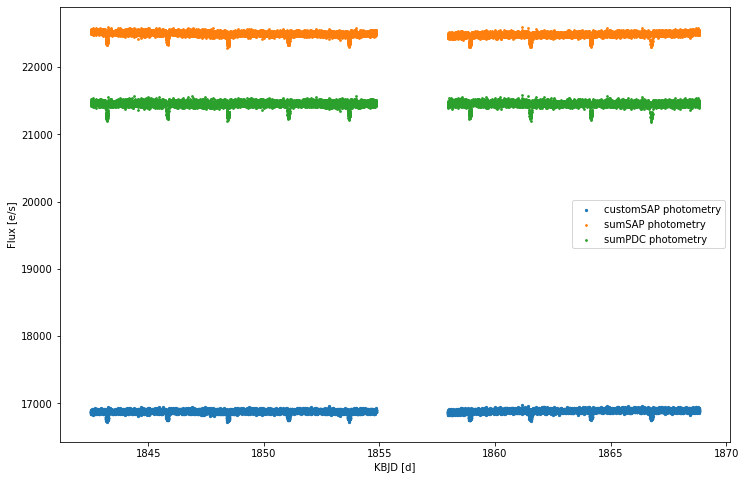

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flux, s=5, label='customSAP photometry')
plt.scatter(XO_2N_sumSAP_time.btjd, XO_2N_sumSAP_flux, s=3, label='sumSAP photometry')
plt.scatter(XO_2N_sumPDC_time.btjd, XO_2N_sumPDC_flux, s=3, label='sumPDC photometry')

plt.legend()
plt.xlabel('KBJD [d]')
plt.ylabel('Flux [e/s]')

plt.show()


NameError: name 'XO_2N_sumSAPtime' is not defined

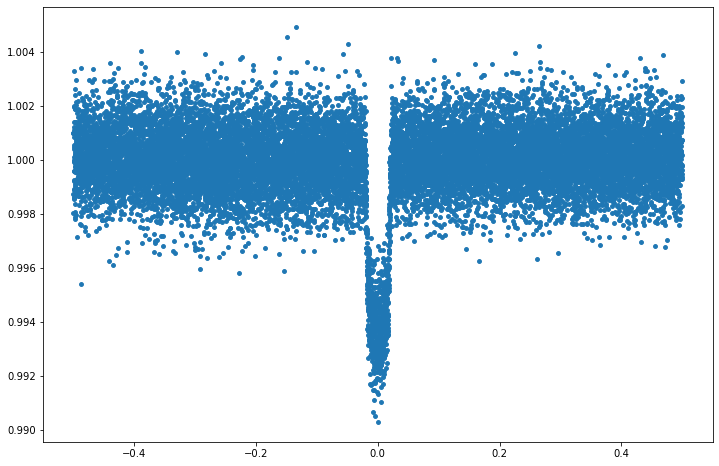

In [18]:
plt.figure(figsize=(12,8))

period = 2.61585922
time_of_transit = 2455565.546480

phase_lims = [0.10, 0.30]

XO_2N_customSAP_phase = (((XO_2N_customSAP_time.btjd+ 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
p1 = plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flux/np.median(XO_2N_customSAP_flux), s=15, label='customSAP photometry')

XO_2N_sumSAP_phase = (((XO_2N_sumSAPtime.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
p2 = plt.scatter(XO_2N_sumSAP_phase, XO_2N_sumSAP_flux/np.median(XO_2N_sumSAP_flux), s=3, label='sumSAP photometry')

XO_2N_sumPDC_phase = (((XO_2N_sumPDCtime.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period
p3 = plt.scatter(XO_2N_sumPDC_phase, XO_2N_sumPDC_flux/np.median(XO_2N_sumPDC_flux), s=3, label='sumPDC photometry')

FFI_data = np.genfromtxt('XO-2N_ffi.dat')
FFI_phase =  (((FFI_data[:,0] + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 

FFI_sel_normalization = ((np.abs(FFI_phase) > phase_lims[0]) & ((np.abs(FFI_phase) < phase_lims[1]))) 
FFI_norm_factor = np.median(FFI_data[FFI_sel_normalization,1])
p4 = plt.scatter(FFI_phase, FFI_data[:,1]/FFI_norm_factor, c='black', s=50, label='FFI')

plt.ylim(0.985 , 1.006)
plt.xlim(-0.06, 0.06)
plt.legend()
plt.xlabel('Phase [Days]')
plt.ylabel('Normalized Flux')
plt.legend([(p1),(p2),(p3),(p4),(p3, p2, p1, p4)], ['customSAP photometry','sumSAP photometry','sumPDC photometry','FFI',r'$\pm  0.000959$'], numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)})
plt.show()


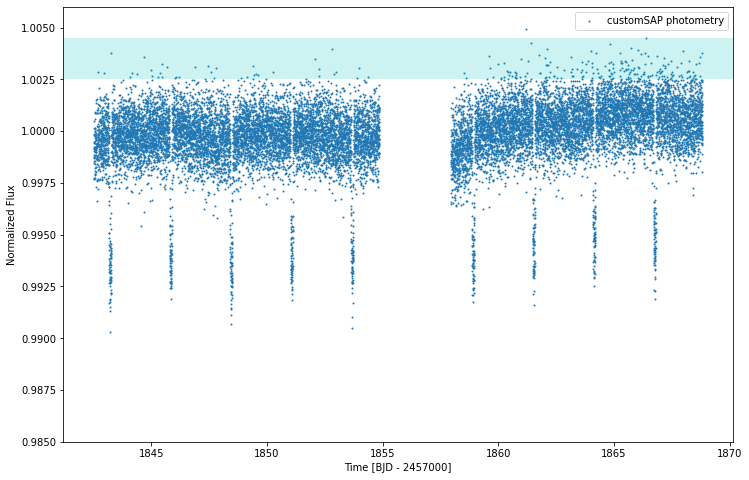

In [19]:
plt.figure(figsize=(12,8))
phase_lims = [0.10, 0.30]

XO_2N_customSAP_phase = XO_2N_customSAP_time.btjd 
plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flux/np.median(XO_2N_customSAP_flux), s=1, label='customSAP photometry')

plt.ylim(0.985 , 1.006)
#plt.xlim(-0.06, 0.06)
plt.legend()
plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
a, b = 1.0025, 1.0045
plt.axhspan(a, b, color='c', alpha=0.2, lw=0)
plt.show()


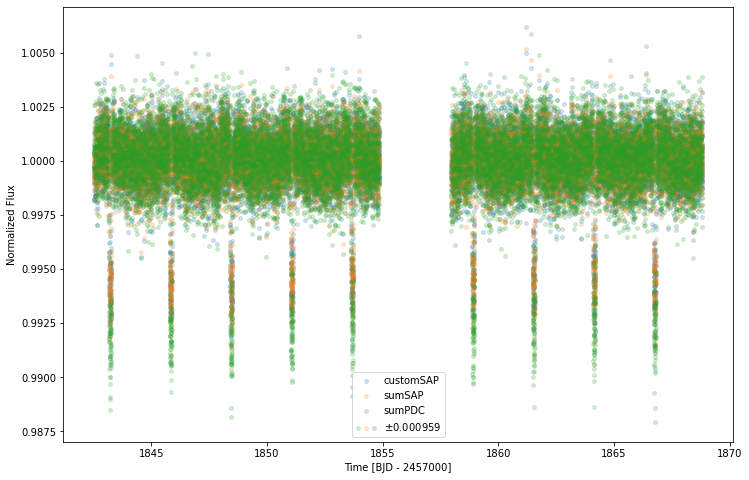

In [20]:
from wotan import flatten

XO_2N_customSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_customSAP_time.btjd,             
    XO_2N_customSAP_flux,               
    method='huber_psi',
    window_length=1.00,    
    edge_cutoff=0.0,      
    break_tolerance=0.0,  
    return_trend=True,    
    cval=5.0              
    )


XO_2N_sumSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_sumSAP_time.btjd,         
    XO_2N_sumSAP_flux,                
    method='huber_psi',
    window_length=1.00,    
    edge_cutoff=0.0,     
    break_tolerance=0.0, 
    return_trend=True,    
    cval=5.0              
    )

XO_2N_sumPDC_flatten_lc, XO_2N_customPDC_trend_lc = flatten(
    XO_2N_sumPDC_time.btjd,                 
    XO_2N_sumPDC_flux,               
    method='huber_psi',
    window_length=1.00,    
    edge_cutoff=0.0,      
    break_tolerance=0.0,  
    return_trend=True,   
    cval=5.0              
    )

plt.figure(figsize=(12,8))
q1 = plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, s=15, alpha=0.2, label='customSAP')
q2 = plt.scatter(XO_2N_sumSAP_time.btjd, XO_2N_sumSAP_flatten_lc, s=15, alpha=0.2)
q3 = plt.scatter(XO_2N_sumPDC_time.btjd, XO_2N_sumPDC_flatten_lc, s=15, alpha=0.2)

plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
plt.legend([(q1),(q2),(q3),(q3, q2, q1)], ['customSAP','sumSAP','sumPDC',r'$\pm  0.000959$'], loc=8, numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)})
plt.show()

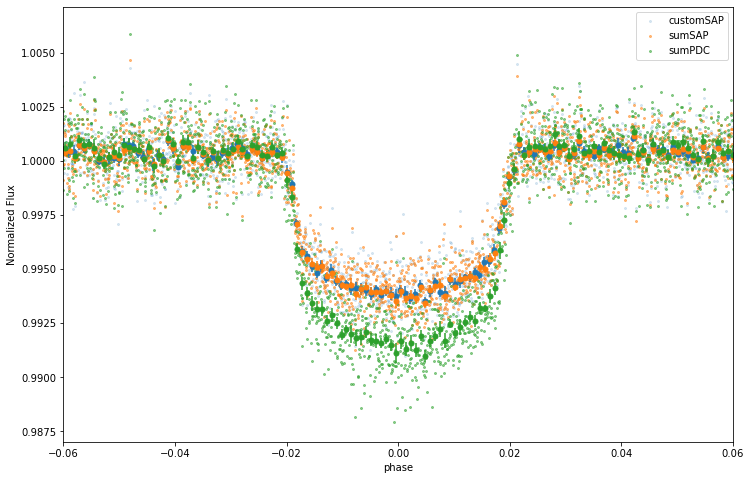

In [22]:
period = 2.61585922
time_of_transit = 2455565.546480

plt.figure(figsize=(12,8))

XO_2N_customSAP_phase =  (((XO_2N_customSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumSAP_phase =  (((XO_2N_sumSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumPDC_phase =  (((XO_2N_sumPDC_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 

plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flatten_lc, c='C0', s=4, label='customSAP', alpha=0.15)
XO_2N_customSAP_phase_index = np.argsort(XO_2N_customSAP_phase)

curve_length = len(XO_2N_customSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_customSAP_phase_binned = np.mean(XO_2N_customSAP_phase[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_flux_binned = np.mean(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_ferr_binned = np.std(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_customSAP_phase_binned, 
             XO_2N_customSAP_flux_binned, 
             yerr = XO_2N_customSAP_ferr_binned, ms=5, fmt='o', c='C0')

plt.scatter(XO_2N_sumSAP_phase, XO_2N_sumSAP_flatten_lc, c='C1', s=4, label='sumSAP', alpha=0.5)

XO_2N_sumSAP_phase_index = np.argsort(XO_2N_sumSAP_phase)
curve_length = len(XO_2N_sumSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_sumSAP_phase_binned = np.mean(XO_2N_sumSAP_phase[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumSAP_flux_binned = np.mean(XO_2N_sumSAP_flatten_lc[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumSAP_ferr_binned = np.std(XO_2N_sumSAP_flatten_lc[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_sumSAP_phase_binned, 
             XO_2N_sumSAP_flux_binned, 
             yerr = XO_2N_sumSAP_ferr_binned, ms=5, fmt='o', c='C1')

plt.scatter(XO_2N_sumPDC_phase, XO_2N_sumPDC_flatten_lc, c='C2', s=4, label='sumPDC', alpha=0.5)

XO_2N_sumPDC_phase_index = np.argsort(XO_2N_sumPDC_phase)
curve_length = len(XO_2N_sumPDC_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_sumPDC_phase_binned = np.mean(XO_2N_sumSAP_phase[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumPDC_flux_binned = np.mean(XO_2N_sumPDC_flatten_lc[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumPDC_ferr_binned = np.std(XO_2N_sumPDC_flatten_lc[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_sumPDC_phase_binned, 
             XO_2N_sumPDC_flux_binned, 
             yerr = XO_2N_sumPDC_ferr_binned, ms=5, fmt='o', c='C2')
             
plt.xlabel('phase')
plt.ylabel('Normalized Flux')
plt.xlim(-0.06, 0.06)
plt.legend()
plt.show()

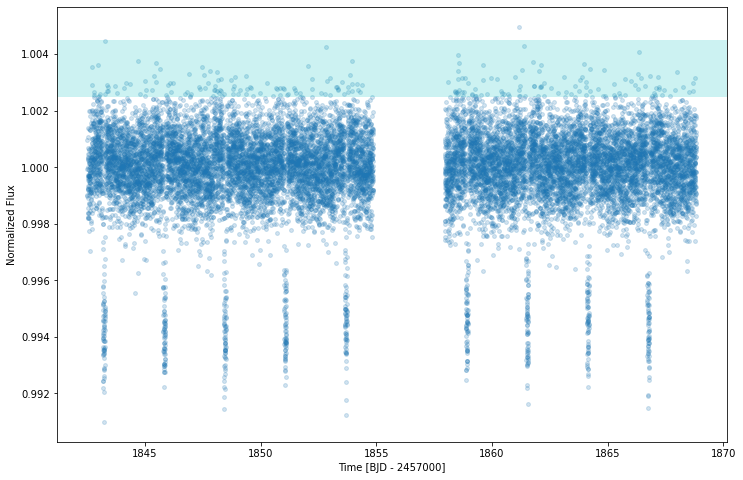

In [24]:
from wotan import flatten

XO_2N_customSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_customSAP_time.btjd,               
    XO_2N_customSAP_flux,                
    method='huber_psi',
    window_length=1.00,    
    edge_cutoff=0.0,      
    break_tolerance=0.0,
    return_trend=True,    
    cval=5.0              
    )
plt.figure(figsize=(12,8))
plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, s=15, alpha=0.2)

plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
a, b = 1.0025, 1.0045
plt.axhspan(a, b, color='c', alpha=0.2, lw=0)
plt.show()

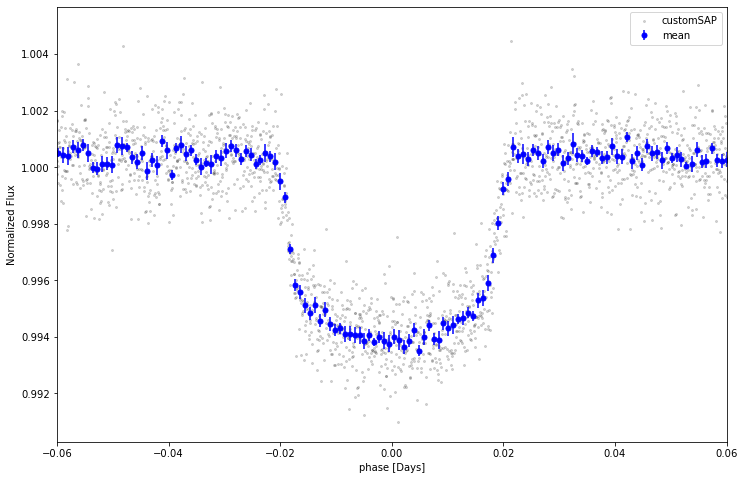

In [25]:
period = 2.61585922
time_of_transit = 2455565.546480

plt.figure(figsize=(12,8))

XO_2N_customSAP_phase =  (((XO_2N_customSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumSAP_phase =  (((XO_2N_sumSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumPDC_phase =  (((XO_2N_sumPDC_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 

plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flatten_lc, c='BLACK', s=4, label='customSAP', alpha=0.15)
XO_2N_customSAP_phase_index = np.argsort(XO_2N_customSAP_phase)

curve_length = len(XO_2N_customSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_customSAP_phase_binned = np.mean(XO_2N_customSAP_phase[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_flux_binned = np.mean(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_ferr_binned = np.std(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_customSAP_phase_binned, 
             XO_2N_customSAP_flux_binned, 
             yerr = XO_2N_customSAP_ferr_binned, ms=5, fmt='o', c='blue', label='mean')

plt.xlabel('phase [Days]')
plt.ylabel('Normalized Flux')
plt.xlim(-0.06, 0.06)
plt.legend()
plt.show()

In [27]:
fileout = open('Data_Files/XO2_flattened_huber_psi.dat', 'w') 

for t, f, e in zip(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, XO_2N_customSAP_flux_err/XO_2N_customSAP_trend_lc):
    if np.isnan(f): continue               
    fileout.write('{0:17.7f} {1:14f} {2:14f}\n'.format(t, f, e))  
               
fileout.close()                